In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Declarartion des constantes
dat = 10**(-3)
n = 2000 #n+1
dr = 0.1
r0 = dr
l = 10
h = 197.326
omega = 8.6/h
E0 = 55
m_n = 939.57
V0 = 50
R0 = 5.8
a = 0.65
V_scen = 0 # 0 if shifted harmonic potential, 1 if Wood Saxon potential

#Fonctions 
def new_r():
    tank = np.zeros(n)
    for i in range(n):
        tank[i] = r0 + dr*i
    return tank
def Enl():
    tank = np.zeros(n)
    for i in range(n):
        tank[i] = h*omega*(2*i + l + 3/2)-E0
    return tank
def V_HO(x):
    return (1/2)*m_n*(omega**2)*(x**2)-E0
def V_Sax(x):
    return -V0/(1 + np.exp((x-R0)/a))
def new_V(r):
    tank = np.zeros([n,n])
    if (V_scen == 0):
        for i in range(n):
            tank[i,i] = V_HO(r[i])
    if (V_scen == 1):
        for i in range(n):
            tank[i,i] = V_Sax(r[i])
    return tank

def new_T():
    tank = np.zeros([n,n])
    for i in range(n):
        tank[i,i] = 2/(dr**2)
    for i in range(n-1):
        tank[i,i+1] = -1/(dr**2)
        tank[i+1,i] = -1/(dr**2)
    return tank 

def new_L_square(r):
    tank = np.zeros([n,n])
    for i in range(n):
        tank[i,i] = l*(l+1)/(r[i]**2)
    return tank

# Création de la matrice H 
r = new_r()
V = new_V(r)
T = new_T()
L_square = new_L_square(r)
H = T + L_square + 2*m_n*V/(h**2) # le terme potentiel pèse trop
eigen_value, eigen_state = np.linalg.eig(H)
sorted_indices = np.argsort(eigen_value)
eigen_value = eigen_value[sorted_indices]
eigen_state = eigen_state[:, sorted_indices]

energies = (h**2)*eigen_value/(2*m_n)

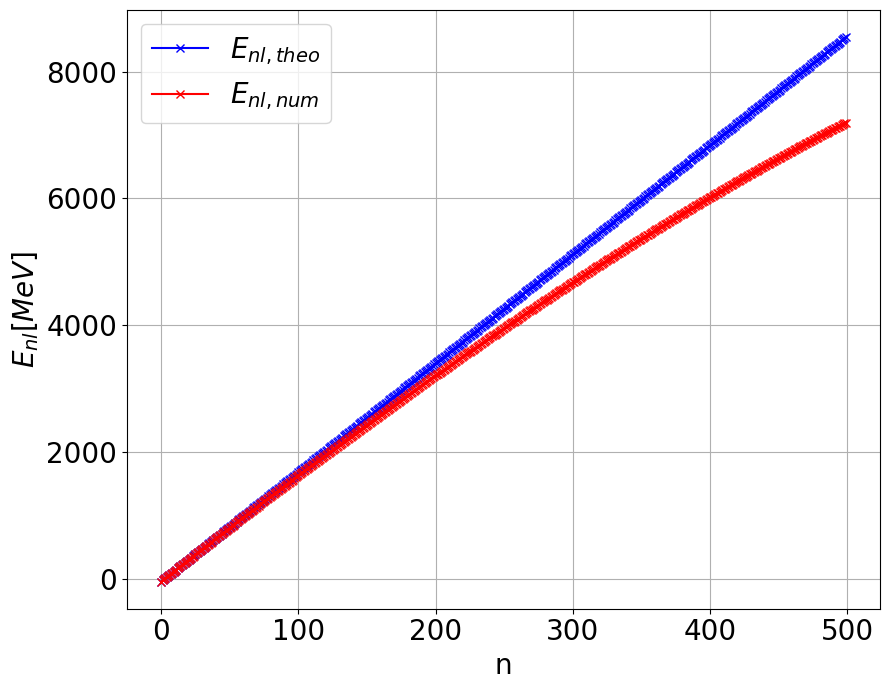

In [4]:
# Eigen value 
n_data= np.arange(n)
plt.figure(figsize=(9, 7))
plt.xlabel("n", fontsize = 20)
plt.ylabel(r"$E_{nl} [MeV]$", fontsize = 20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.grid(True)
plt.plot(n_data[:500],Enl()[:500],color = "blue",marker = "x", label = r"$E_{nl,theo}$")
plt.plot(n_data[:500],energies[:500],color = "red",marker = "x", label = r"$E_{nl,num}$")
plt.tight_layout()
plt.legend(fontsize = 20)
plt.savefig("Energies_HO_l_0")

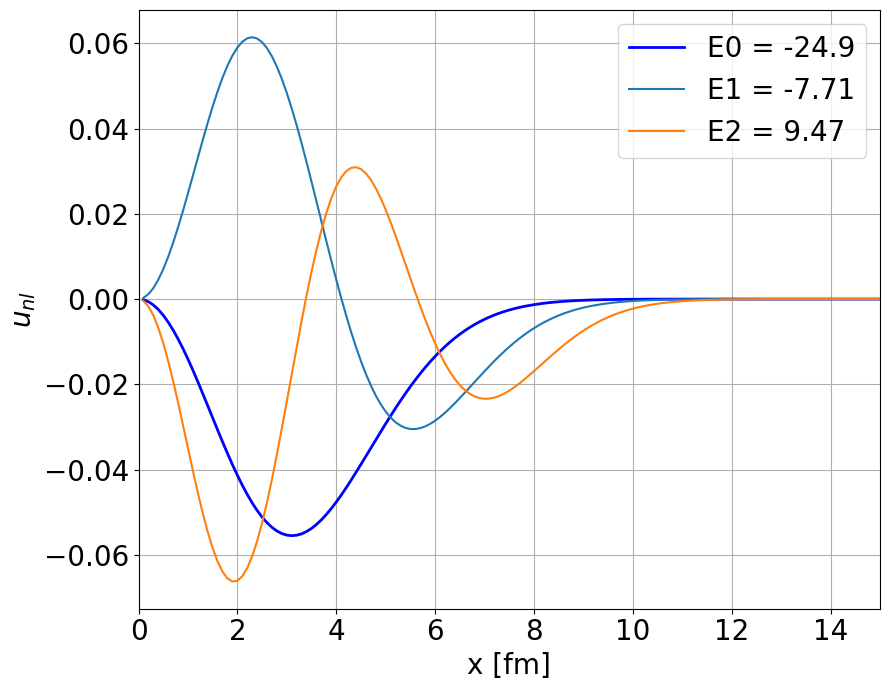

In [8]:
#Wavefunctions
plt.figure(figsize=(9, 7))
plt.xlabel("x [fm]", fontsize = 20)
plt.ylabel(r"$u_{nl}$", fontsize = 20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.grid(True)
plt.plot(r,eigen_state[:,0]/r,color='blue', linestyle='-', linewidth=2,label = f"E0 = {np.round(energies[0],2)}")
plt.plot(r,eigen_state[:,1]/r,label = f"E1 = {np.round(energies[1],2)}")
plt.plot(r,eigen_state[:,2]/r,label = f"E2 = {np.round(energies[2],2)}")
plt.tight_layout()
plt.xlim(0,15)
plt.legend(fontsize = 20)
plt.savefig("Wavefunctions_HO_l_10")